In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:
!cp -r /content/drive/MyDrive/dataset-resized /content

In [ ]:
import kagglehub

path = kagglehub.dataset_download("feyzazkefe/trashnet")

print("Path to dataset files:", path)

In [ ]:
# !cp -r /content/drive/MyDrive/dataset-resized /content

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Preprocessing
train = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

test = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)
path = '/content/dataset-resized'

train_generator = train.flow_from_directory(
    path,
    batch_size = 32,
    target_size = (300, 300),
    class_mode = 'categorical',
    subset = 'training'
)

test_generator = test.flow_from_directory(
    path,
    batch_size = 32,
    target_size = (300, 300),
    class_mode = 'categorical',
    subset = 'validation'
)

labels = train_generator.class_indices
labels2 = test_generator.class_indices
print(labels, labels2)

for image_batch, image_labels in train_generator:
    break
print(image_batch.shape, image_labels.shape)

# Writing output labels to a txt file
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt', 'w') as label_write:
    label_write.write(Labels)

model = models.Sequential()

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(6, activation='softmax'))

filepath="trained_model.keras"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model.fit(train_generator,
                    epochs=50,
                    validation_data=test_generator,
                    callbacks=callbacks_list)





Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
(32, 300, 300, 3) (32, 6)
Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - acc: 0.2238 - loss: 1.7422
Epoch 1: val_acc improved from -inf to 0.30279, saving model to trained_model.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 63s 754ms/step - acc: 0.2242 - loss: 1.7415 - val_acc: 0.3028 - val_loss: 1.5659
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - acc: 0.3224 - loss: 1.5494
Epoch 2: val_acc improved from 0.30279 to 0.39442, saving model to trained_model.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 73s 639ms/step - acc: 0.3226 - loss: 1.5492 - val_acc: 0.3944 - val_loss: 1.4408
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 639ms/step - acc: 0.3944 - loss: 1.4460
Epoch 3: val_acc improved from 0.39442 to 0.41036, saving model to trained_model.keras
72/72 ━━━━━━━━━━

In [ ]:
model.save('trained_model.keras')  # Save model immediately

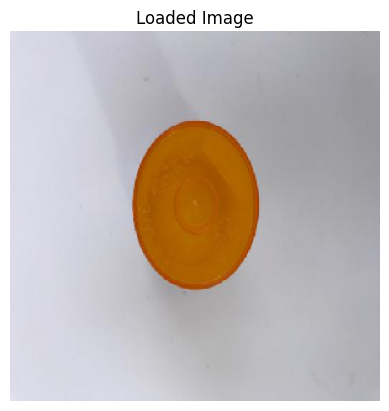

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
Maximum Probability:  0.9196105
Classified: plastic


In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/dataset-resized/plastic/plastic102.jpg'

# Load image with the correct target size
img = image.load_img(img_path, target_size=(300, 300))

# Convert the image to an array and normalize
img = image.img_to_array(img, dtype=np.uint8)
img = img / 255.0  # Normalize the image

# Display the image
plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img)
plt.show()

model_path = '/content/trained_model.keras'
model = tf.keras.models.load_model(model_path)

img_batch = np.expand_dims(img, axis=0)

p = model.predict(img_batch)

print("Maximum Probability: ", np.max(p[0], axis=-1))

predicted_class = list(labels.keys())[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class)


In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 298, 298, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 149, 149, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 147, 147, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 73, 73, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 36, 36, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 18, 18, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         663,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,222,036 (8.48 MB)

 Trainable params: 740,678 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,481,358 (5.65 MB)

In [ ]:
train_loss, train_acc = model.evaluate(train_generator, verbose=1)
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")


72/72 ━━━━━━━━━━━━━━━━━━━━ 48s 660ms/step - acc: 0.7852 - loss: 0.5808
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - acc: 0.7303 - loss: 0.7609
Training Accuracy: 79.35%
Test Accuracy: 72.11%


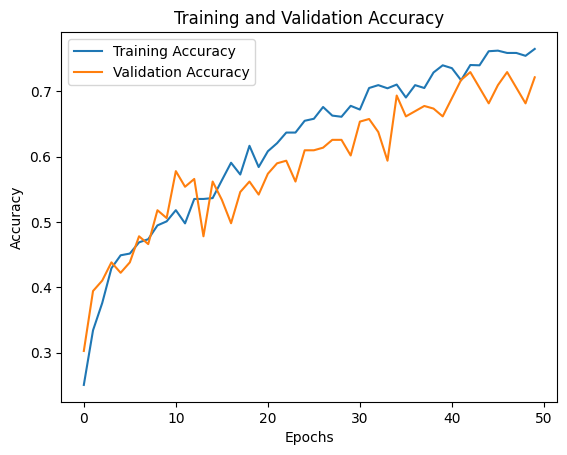

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Saving the plot as an image
plt.savefig('/content/training_validation_accuracy_plot.png')

# Display the plot
plt.show()